In [17]:
from ozclim import tools
import xarray as xr 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns 
import numpy as np 
from scipy import stats 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Open MDA8 O3 output for all three climate scenarios 

# Present-day
ref = tools.get_ensemble_ds("ref", "MDA8_O3")*1e9 # ppbv
ref = tools.mask_ocean_c48(ref)
ref = ref.chunk({"sim": -1, "time": -1})

refSNOx = tools.get_ensemble_ds("refSNOx", "MDA8_O3")*1e9 # ppbv
refSNOx = tools.mask_ocean_c48(refSNOx)
refSNOx = refSNOx.chunk({"sim": -1, "time": -1})

# Future-high
refshort = tools.get_ensemble_ds("refshort", "MDA8_O3")*1e9 # ppbv
refshort = tools.mask_ocean_c48(refshort)
refshort = refshort.chunk({"sim": -1, "time": -1})

refSNOxshort = tools.get_ensemble_ds("refSNOxshort", "MDA8_O3")*1e9 # ppbv
refSNOxshort = tools.mask_ocean_c48(refSNOxshort)
refSNOxshort = refSNOxshort.chunk({"sim": -1, "time": -1})

# Future-low
polshort = tools.get_ensemble_ds("pol3.7short", "MDA8_O3")*1e9 # ppbv
polshort = tools.mask_ocean_c48(polshort)
polshort = polshort.chunk({"sim": -1, "time": -1})

polSNOxshort = tools.get_ensemble_ds("pol3.7SNOxshort", "MDA8_O3")*1e9 # ppbv
polSNOxshort = tools.mask_ocean_c48(polSNOxshort)
polSNOxshort = polSNOxshort.chunk({"sim": -1, "time": -1})


['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w28_ref_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w10_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w13_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w14_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_c48_20240312/GCHP.w26_refSNOx_c48.MDA8_O3.nc4']
['/home/eleroy/proj-dirs/OZCLIM/data/analysis_da

In [3]:
# July 99th percentile

def get_values(month, region_num):
    ref_july = ref["SpeciesConc_O3"].sel(time=ref["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    ref_july_region = tools.crop_regionmask_ar6_c48(ref_july, region_num)
    ref_july_region_mean = ref_july_region.mean(dim=["nf", "Xdim", "Ydim"])

    #ref_july_region_mean_99th = ref_july_region_mean.quantile(0.99, dim=["time", "sim"])
    ref_july_region_mean_99th = ref_july_region_mean.quantile(.99, dim=["time", "sim"])
    print("extreme value:")
    print(ref_july_region_mean_99th.values)

    refSNOx_july = refSNOx["SpeciesConc_O3"].sel(time=refSNOx["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    refSNOx_july_region = tools.crop_regionmask_ar6_c48(refSNOx_july, region_num)
    refSNOx_july_region_mean = refSNOx_july_region.mean(dim=["nf", "Xdim", "Ydim"])

    refshort_july = refshort["SpeciesConc_O3"].sel(time=refshort["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    refshort_july_region = tools.crop_regionmask_ar6_c48(refshort_july, region_num)
    refshort_july_region_mean = refshort_july_region.mean(dim=["nf", "Xdim", "Ydim"])

    refSNOxshort_july = refSNOxshort["SpeciesConc_O3"].sel(time=refSNOxshort["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    refSNOxshort_july_region = tools.crop_regionmask_ar6_c48(refSNOxshort_july, region_num)
    refSNOxshort_july_region_mean = refSNOxshort_july_region.mean(dim=["nf", "Xdim", "Ydim"])

    polshort_july = polshort["SpeciesConc_O3"].sel(time=polshort["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    polshort_july_region = tools.crop_regionmask_ar6_c48(polshort_july, region_num)
    polshort_july_region_mean = polshort_july_region.mean(dim=["nf", "Xdim", "Ydim"])

    polSNOxshort_july = polSNOxshort["SpeciesConc_O3"].sel(time=polSNOxshort["SpeciesConc_O3"].time.dt.month.isin(month)).isel(lev=0)
    polSNOxshort_july_region = tools.crop_regionmask_ar6_c48(polSNOxshort_july, region_num)
    polSNOxshort_july_region_mean = polSNOxshort_july_region.mean(dim=["nf", "Xdim", "Ydim"])


    ref_days_above_99 = ref_july_region_mean.where(ref_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])
    refSNOx_days_above_99 = refSNOx_july_region_mean.where(refSNOx_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])
    refshort_days_above_99 = refshort_july_region_mean.where(refshort_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])
    refSNOxshort_days_above_99 = refSNOxshort_july_region_mean.where(refSNOxshort_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])
    polshort_days_above_99 = polshort_july_region_mean.where(polshort_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])
    polSNOxshort_days_above_99 = polSNOxshort_july_region_mean.where(polSNOxshort_july_region_mean > ref_july_region_mean_99th).resample(time='1Y').count(dim=['time'])

    return ref_days_above_99, refSNOx_days_above_99, refshort_days_above_99, refSNOxshort_days_above_99, polshort_days_above_99, polSNOxshort_days_above_99

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bars(month, region_num, ax):

    ref_days_above_99, refSNOx_days_above_99, refshort_days_above_99, refSNOxshort_days_above_99, polshort_days_above_99, polSNOxshort_days_above_99 = get_values(month, region_num)

    # Calculate days above 99th percentile
    counts1 = np.sum(ref_days_above_99.values)/2480*100
    counts2 = np.sum(refSNOx_days_above_99.values)/2480*100
    counts3 = np.sum(refshort_days_above_99.values)/2480*100
    counts4 = np.sum(refSNOxshort_days_above_99.values)/2480*100
    counts5 = np.sum(polshort_days_above_99.values)/2480*100
    counts6 = np.sum(polSNOxshort_days_above_99.values)/2480*100

    bar_width = 0.2  

    x1 = np.array([0])  
    x2 = x1 + bar_width  
    x3 = x2 + bar_width 
    x4 = x3 + bar_width 
    x5 = x4 + bar_width  
    x6 = x5 + bar_width  

    ax.bar(x1, counts1, width=bar_width, color='grey', alpha=0.7, edgecolor='black', label='Historical')
    ax.bar(x2, counts2, width=bar_width, color='white', hatch='////', alpha=0.7, edgecolor='black', label='Historical-LNOx')
    ax.bar(x3, counts3, width=bar_width, color='red', alpha=0.7, edgecolor='red', label='High-Warming')
    ax.bar(x4, counts4, width=bar_width, color='white', hatch='////', alpha=0.7, edgecolor='red', label='High-Warming-LNOx')
    ax.bar(x5, counts5, width=bar_width, color='dodgerblue', alpha=0.7, edgecolor='dodgerblue', label='Low-Warming')
    ax.bar(x6, counts6, width=bar_width, color='white', alpha=0.7, edgecolor='dodgerblue', hatch='////', label='Low-Warming-LNOx')

    for x, count in zip(x1, [counts1]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='black')

    for x, count in zip(x2, [counts2]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='black')

    for x, count in zip(x3, [counts3]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='red')

    for x, count in zip(x4, [counts4]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='red')

    for x, count in zip(x5, [counts5]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='dodgerblue')

    for x, count in zip(x6, [counts6]):
        ax.text(x + (bar_width-0.2) / 2, count, f"{count:.2f}", ha='center', va='bottom', fontsize=7, color='dodgerblue')

    return ax


extreme value:
[77.02785269]
extreme value:
[69.36833378]
extreme value:
[67.14602232]
extreme value:
[47.77392144]
extreme value:
[45.41796602]
extreme value:
[44.15184837]


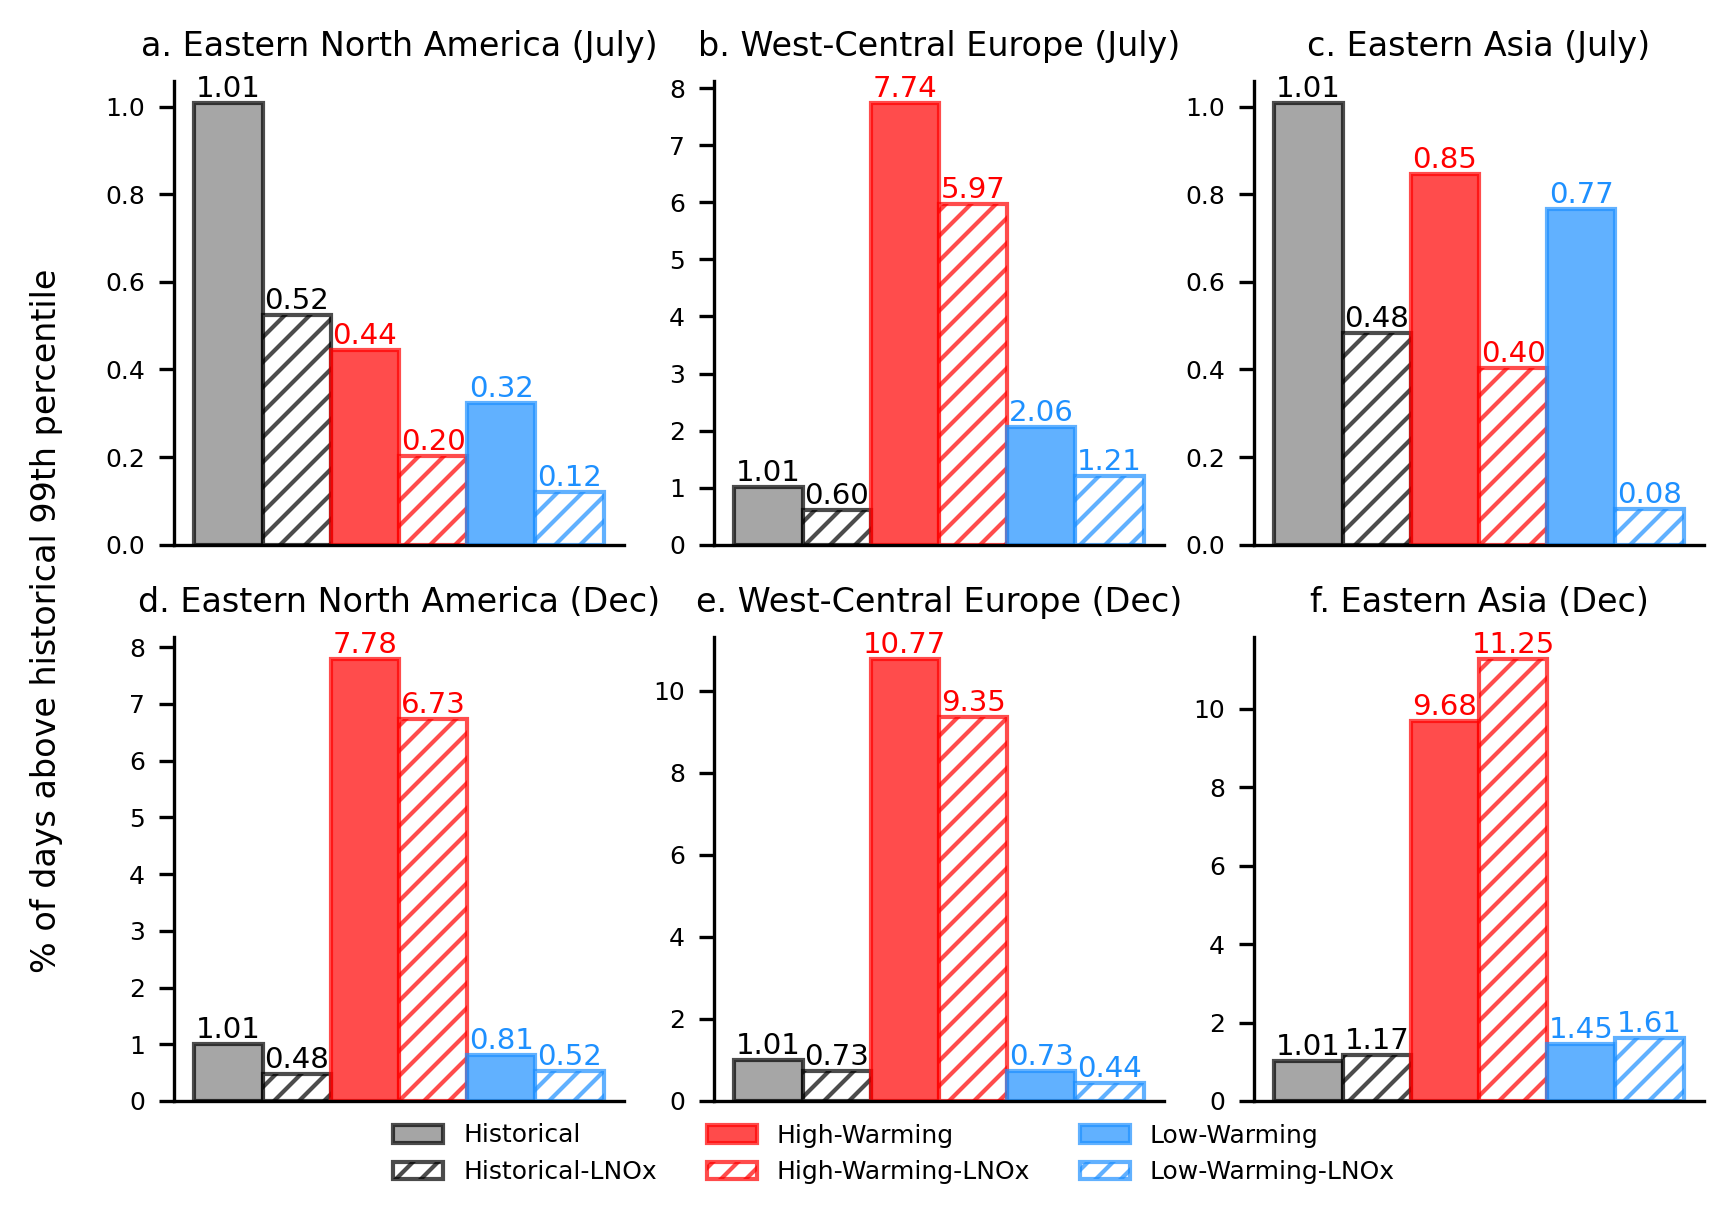

In [22]:
fig_width_in = 6
fig_height_in = 4

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300)

gs1 = GridSpec(2, 3, top=0.95, bottom=0.10, left=0.10, right=0.95, hspace=0.2, wspace=0.2)
ax0 = fig.add_subplot(gs1[0, 0])
ax1 = fig.add_subplot(gs1[0, 1])
ax2 = fig.add_subplot(gs1[0, 2])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])
ax5 = fig.add_subplot(gs1[1, 2])

ax = [ax0, ax1, ax2, ax3, ax4, ax5]

titles = [
    "a. Eastern North America (July)", "b. West-Central Europe (July)", "c. Eastern Asia (July)",
    "d. Eastern North America (Dec)", "e. West-Central Europe (Dec)", "f. Eastern Asia (Dec)"
]

ax0 = plot_bars(7, 5, ax[0])
ax1 = plot_bars(7, 17, ax[1])
ax2 = plot_bars(7, 35, ax[2])
ax3 = plot_bars(12, 5, ax[3])
ax4 = plot_bars(12, 17, ax[4])
ax5 = plot_bars(12, 35, ax[5])

ylabel = "% of days above historical 99th percentile"
fig.supylabel(ylabel, fontsize=8)  # Set global ylabel

for idx, axis in enumerate(ax):
    axis.spines[['right', 'top']].set_visible(False)
    axis.tick_params(axis='both', labelsize=6)  # Adjust tick label size
    axis.set_xticklabels([])
    axis.tick_params(bottom = False) 
    axis.tick_params(axis='both', labelsize=6)  # Adjust tick label size
    axis.set_title(titles[idx], fontsize=8)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.10), fontsize=6, frameon=False)
plt.savefig("Fig4.pdf")
